In [1]:
import pandas as pd
import numpy as np
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt

In [2]:
recipe = pd.read_csv('./data/recipe_db.csv', index_col=0)
recipe = recipe.fillna('')
recipe.head()

,제목,설명,팁
id,,,
1,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식,짜장라면에 오리고기가 잘 맞아요. 오리기름이 몸에 해롭지 않은 기름이고 오리고기가 ...,오리기름이 몸에 해롭지 않은 기름이고 오리고기가 몸에 열을 내는 성질이 있어 겨울철...
2,69레시피 불고기 소고기볶음반찬,볶음 불고기를 해보았어요. 불고기용 고기를 사용하였어요. 반찬으로 만든거라 2인분으...,"고기의 양이나 야채의 양, 또는 간장의 종류에 따라 간이 달라지므로 중간에 한번 간..."
3,풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬,풋마늘은 나트륨 배출은 물론 신지대사의 활성화를 돕는다천기누설 위의 양념에는 딱딱한...,위의 양념에는 딱딱한 건새우보다 조금 작고 얇은 보리새우가 더 맛있는것 같습니다. ...
4,최애반찬 소시지 감자조림,"감자조림에 비엔나소시지 넣고 조린 소시지 감자조림인데 아이, 어른 함께 호불호 없...",비엔나소시지 대신 햄 넣고 만들어도 좋아요
5,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기,"지금까지 이런 버섯은 없었다. 이것은 관자인가 버섯인가 재료 새송이버섯 2개, 버터...",


In [3]:
recipe['data'] = recipe['제목'] + ' ' + recipe['설명'] + ' ' + recipe['팁']
del recipe['제목']
del recipe['설명']
del recipe['팁']
recipe.head()

,data
id,
1,밥솥 오리고기 짜장라면몸에 열을 내주는 겨울간식 짜장라면에 오리고기가 잘 맞아요. ...
2,69레시피 불고기 소고기볶음반찬 볶음 불고기를 해보았어요. 불고기용 고기를 사용하였...
3,풋마늘 건새우 볶음나트륨 배출을 돕는 최애 반찬 풋마늘은 나트륨 배출은 물론 신지대...
4,최애반찬 소시지 감자조림 감자조림에 비엔나소시지 넣고 조린 소시지 감자조림인데 아...
5,버섯으로 관자 느낌 내는 방법! 새송이버섯간장버터구이 만들기 지금까지 이런 버섯은 ...


In [4]:
recipe.to_csv("./data/recipe_word2vec_data.csv", mode='w')
data = pd.read_csv('./data/recipe_word2vec_data.csv', index_col=0)

In [5]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '스푼', '큰술', '큰 술', '작은술', '작은 술', '숟갈', '조각', '종이컵', '컵', '그램', 'g', 'T', 'ml', 'L']

레시피의 최대 길이 : 914
렛의 평균 길이 : 242.11029941846493


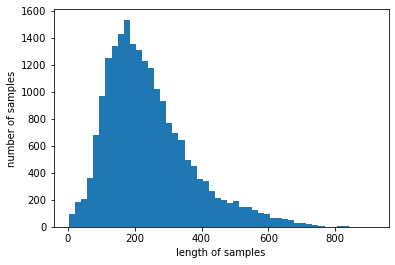

In [6]:
okt = Okt()
tokenized_data = []
for sentence in data['data']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
print('레시피의 최대 길이 :',max(len(l) for l in tokenized_data))
print('렛의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [7]:
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [8]:
model.wv.vectors.shape

(13126, 100)

In [9]:
result = model.wv.most_similar("돼지고기")
print(result)

[('쇠고기', 0.7618555426597595), ('소고기', 0.7514750957489014), ('목살', 0.7054042816162109), ('고기', 0.6532403230667114), ('앞다리', 0.6281648874282837), ('돼지', 0.6179356575012207), ('등심', 0.614638090133667), ('삼겹살', 0.5928285121917725), ('사태', 0.5782474279403687), ('닭고기', 0.5604683756828308)]
